In [5]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
import scipy.stats as stat
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split

C:\Users\harsmoha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
from scipy.cluster import hierarchy

In [7]:
digitdata = load_digits()

In [8]:
digitX = digitdata['data']
digitX.shape

(1797, 64)

In [9]:
digitY = digitdata.target

In [10]:
digitX

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [11]:
z = hierarchy.linkage(digitX,'complete')
z

array([[  1.58500000e+03,   1.64800000e+03,   5.29150262e+00,
          2.00000000e+00],
       [  1.24700000e+03,   1.25000000e+03,   7.54983444e+00,
          2.00000000e+00],
       [  7.77000000e+02,   1.23700000e+03,   7.93725393e+00,
          2.00000000e+00],
       ..., 
       [  3.58400000e+03,   3.58900000e+03,   7.18052923e+01,
          8.63000000e+02],
       [  3.58700000e+03,   3.58800000e+03,   7.44983221e+01,
          9.34000000e+02],
       [  3.59000000e+03,   3.59100000e+03,   7.70389512e+01,
          1.79700000e+03]])

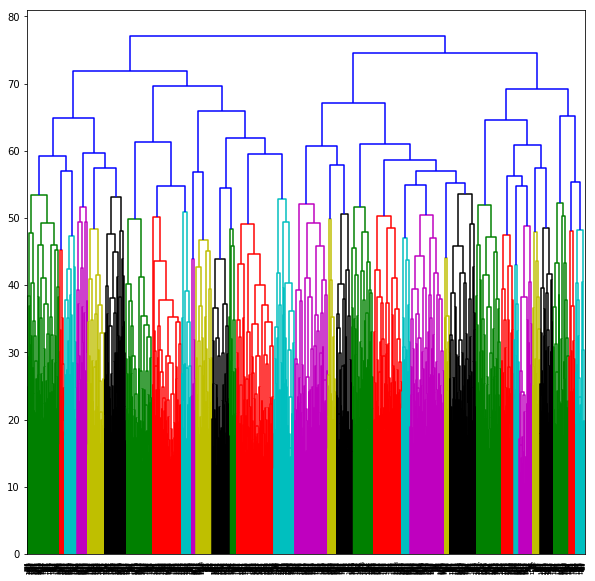

In [12]:
#hierarchy.dendrogram(z,p=10,truncate_mode='lastp',show_contracted=True)
plt.figure(figsize=(10,10))
hierarchy.dendrogram(z)
plt.show()

In [13]:
"""For calcuating threshold (t), find longest vertical line in dendogram which doesnt cross any horizonal line(assuming 
all horizontal lines extend across the whole of dendograph width. Then draw a horizonal line across that vertical line and the 
intersections would be #of clusters)"""

clusters = hierarchy.fcluster(z,t=10,criterion='maxclust')
len(np.unique(clusters))

10

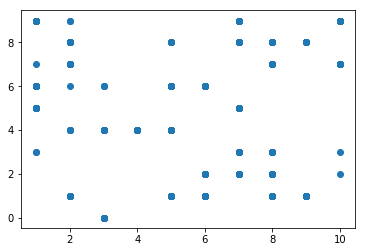

In [14]:
plt.scatter(clusters,digitY)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
#Doing scaling
scalar = StandardScaler()

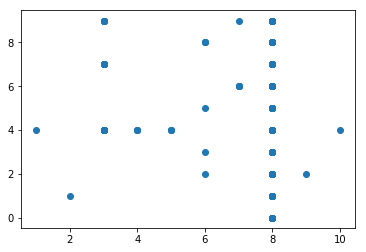

In [17]:
digit_sc_X = scalar.fit_transform(digitX)
linkage = hierarchy.linkage(digit_sc_X,'complete')
clusters1 = hierarchy.fcluster(linkage,criterion='maxclust',t=10)
plt.scatter(clusters1, digitY)
plt.show()
#Not able to understand a large clusters, so it is not efficient

In [18]:
len(digit_sc_X)

1797

In [19]:
digit_sc_X.shape

(1797, 64)

In [20]:
#Trying with sklearn KMeans

from scipy.cluster import vq
from sklearn.cluster import KMeans
from sklearn import metrics

In [21]:
skmeans = KMeans(10)

In [22]:
skmeans.fit(digit_sc_X)
#n_init denotes the number of times KMeans algo will run with different random centroids in starting

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
np.unique(skmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
#Use silhouette_score to find accuracy. Elbow method is another technique to find optimal num of clusters
z=0
score = [0]*len(range(5,20))
for i in range(5,20):
    kmean = KMeans(i)
    kmean.fit(digit_sc_X)
    score[z] = metrics.silhouette_score(digit_sc_X,kmean.labels_)
    z+=1

In [25]:
score

[0.10037569328330705,
 0.10196070603460143,
 0.11516233416549922,
 0.13238445139300131,
 0.13711711683251918,
 0.1457506457604083,
 0.15775789400094797,
 0.15970094741983976,
 0.15307545982165838,
 0.15076608183766063,
 0.1480707705127412,
 0.14799943762748877,
 0.14970219690560982,
 0.15689492965774168,
 0.15741256804178211]

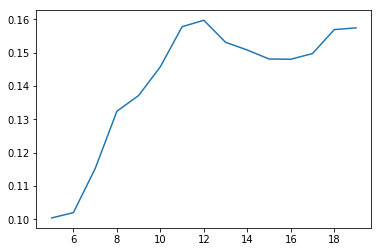

In [26]:
plt.plot(range(5,20),score)
plt.show()

In [27]:
#Calculating wcss (Within Cluster Sum of Squares) using KMeans and elbow method
#wcss = [0]*len(range(5,20))
wcss = []
for i in range(1,20):
    kmean = KMeans(i)
    kmean.fit(digit_sc_X)
    wcss.append(kmean.inertia_)

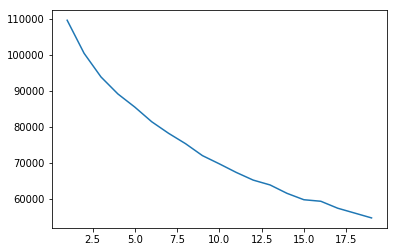

In [28]:
plt.plot(range(1,20),wcss)
plt.show()

In [29]:
#Calculating wcss without scaling on train data
#wcss = [0]*len(range(5,20))
wcss1 = []
for i in range(1,20):
    kmean = KMeans(i,random_state=10)
    kmean.fit(digitX)
    wcss1.append(kmean.inertia_)

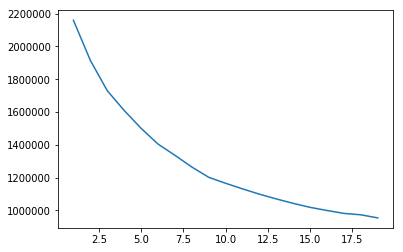

In [30]:
plt.plot(range(1,20),wcss1)
plt.show()

In [31]:
digitX.shape

(1797, 64)

In [32]:
kmean = KMeans(n_clusters=10,random_state=10)
predicted = kmean.fit_predict(digitX)
predicted

array([2, 0, 0, ..., 0, 4, 4])

In [33]:
kmean.cluster_centers_[2]

array([  0.00000000e+00,   2.23463687e-02,   4.22905028e+00,
         1.31396648e+01,   1.12681564e+01,   2.93854749e+00,
         3.35195531e-02,  -2.77555756e-16,  -2.51534904e-17,
         8.82681564e-01,   1.26201117e+01,   1.33687151e+01,
         1.14078212e+01,   1.13687151e+01,   9.60893855e-01,
         3.60822483e-16,  -1.25767452e-17,   3.72625698e+00,
         1.42122905e+01,   5.25139665e+00,   2.10614525e+00,
         1.21173184e+01,   3.53072626e+00,   5.55111512e-17,
        -2.81892565e-18,   5.29608939e+00,   1.26424581e+01,
         2.03351955e+00,   2.29050279e-01,   9.07821229e+00,
         6.47486034e+00,  -5.63785130e-18,   0.00000000e+00,
         5.88268156e+00,   1.14916201e+01,   8.65921788e-01,
         3.35195531e-02,   8.81005587e+00,   7.15083799e+00,
         0.00000000e+00,  -2.25514052e-17,   3.51396648e+00,
         1.32849162e+01,   1.65921788e+00,   1.49162011e+00,
         1.13519553e+01,   5.84357542e+00,  -2.08166817e-17,
        -2.42861287e-17,

In [34]:
#It shows without logistic regression, it fails to predict
print (metrics.classification_report(digitY,predicted))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       178
          1       0.00      0.00      0.00       182
          2       0.01      0.01      0.01       177
          3       0.00      0.00      0.00       183
          4       0.00      0.00      0.00       181
          5       0.01      0.01      0.01       182
          6       0.00      0.00      0.00       181
          7       0.09      0.05      0.06       179
          8       0.03      0.02      0.02       174
          9       0.04      0.04      0.04       180

avg / total       0.02      0.01      0.01      1797



In [35]:
print (metrics.confusion_matrix(digitY,predicted))

[[  0   1 177   0   0   0   0   0   0   0]
 [ 99   0   0   2   0   1  24  55   1   0]
 [  8   0   1   0   2  13 148   2   0   3]
 [  7   0   0   0   9 158   1   0   2   6]
 [  3 167   0   0   0   0   0   2   0   9]
 [  0   2   0   1  42   1   0   0 136   0]
 [  3   0   1 177   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   9   0 168]
 [102   0   0   2  48   2   3  10   4   3]
 [  2   0   0   0 140   6   0  21   4   7]]


In [36]:
#Using MDS to understand clustering and correlation among observations
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances

In [37]:
digit_arr = digit_sc_X.tolist()
dist = euclidean_distances(digit_arr,digit_arr)

In [38]:
mds = MDS(dissimilarity='precomputed',random_state=30)
mdsX = mds.fit_transform(dist)

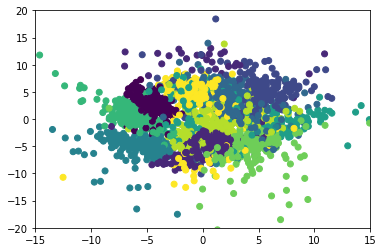

In [39]:
mdsarrX = np.array(mdsX)
plt.scatter(mdsarrX[:,0],mdsarrX[:,1],c=digitY)
plt.xlim([-15,15])
plt.ylim([-20,20])
plt.show()
#Too much overlapping in graph, so its not suitable for modeling yet

In [40]:
len(mdsarrX[:,:0])

1797

In [41]:
len(mdsarrX[:,0])

1797

In [44]:
#Using LDA(Linear Discriminant Analysis)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [45]:
lda = LDA(n_components=2)

In [47]:
X_train = lda.fit_transform(digit_sc_X, digitY)

C:\Users\harsmoha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [49]:
Y_train = lda.transform(digitY.reshape(-1,1))
#Now put X_train and Y_train in model for training

In [90]:
#Using sklearn PCA
from sklearn.decomposition import PCA

In [91]:
pca1 = PCA(0.99)

In [92]:
digit_sc_X.shape

(1797, 64)

In [93]:
pca1.fit(digit_sc_X)
pcomponents = pca1.fit_transform(digit_sc_X)
pca1.n_components_

54

In [94]:
pca1.explained_variance_ratio_

array([ 0.12033916,  0.09561054,  0.08444415,  0.06498408,  0.04860155,
        0.0421412 ,  0.03942083,  0.03389381,  0.02998221,  0.02932003,
        0.02781805,  0.02577055,  0.02275303,  0.0222718 ,  0.02165229,
        0.01914167,  0.01775547,  0.01638069,  0.0159646 ,  0.01489191,
        0.0134797 ,  0.01271931,  0.01165837,  0.01057647,  0.00975316,
        0.00944559,  0.00863014,  0.00836643,  0.00797693,  0.00746471,
        0.00725582,  0.00691911,  0.00653909,  0.00640793,  0.00591384,
        0.00571162,  0.00523637,  0.00481808,  0.00453719,  0.00423163,
        0.00406053,  0.00397085,  0.00356493,  0.00340787,  0.00327835,
        0.00311032,  0.00288575,  0.00276489,  0.00259175,  0.00234483,
        0.00218257,  0.00203598,  0.00195512,  0.00183318])

In [95]:
pca1.components_.shape

(54, 64)

In [96]:
pcomponents.shape

(1797, 54)

In [97]:
#Using PCA and Logistic regression to build model

In [98]:
digittrainX, digittestX,digittrainY,digittestY = train_test_split(digitdata['data'],digitdata.target, test_size=0.2,random_state=43)

In [99]:
digittrainX.shape

(1437, 64)

In [100]:
digittestX.shape

(360, 64)

In [101]:
pca2 = PCA(0.99)

In [102]:
scalar1 = StandardScaler()
digittrain_sc_X = scalar1.fit_transform(digittrainX)

In [103]:
#No scalar fit to be done on test data
digittest_sc_X = scalar1.transform(digittestX)

In [104]:
digittrain_pca_X = pca2.fit_transform(digittrain_sc_X)


In [105]:
#No PCA fit to be done on test data
digittest_pca_X = pca2.transform(digittest_sc_X)

In [106]:
digittrain_pca_X.shape

(1437, 54)

In [107]:
digittest_pca_X.shape

(360, 54)

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
logreg = LogisticRegression()

In [110]:
logmodel2 = logreg.fit(digittrain_pca_X,digittrainY)

In [111]:
predicted2 = logmodel2.predict(digittest_pca_X)
predicted2

array([1, 8, 3, 8, 6, 0, 6, 5, 1, 1, 7, 1, 3, 9, 2, 6, 0, 4, 7, 4, 7, 0, 0,
       8, 5, 0, 8, 2, 5, 3, 8, 6, 9, 1, 0, 7, 6, 7, 4, 8, 9, 6, 4, 0, 4, 6,
       4, 4, 6, 0, 5, 0, 5, 4, 5, 9, 7, 5, 7, 4, 4, 6, 4, 6, 5, 4, 1, 5, 6,
       4, 7, 4, 2, 6, 7, 4, 0, 4, 0, 8, 8, 0, 3, 5, 9, 6, 0, 5, 3, 0, 0, 4,
       6, 9, 6, 6, 9, 4, 6, 9, 3, 7, 8, 9, 7, 0, 3, 5, 6, 3, 5, 2, 1, 9, 7,
       7, 7, 7, 7, 0, 9, 2, 5, 7, 7, 4, 8, 3, 2, 6, 8, 0, 1, 6, 4, 4, 8, 0,
       9, 0, 1, 6, 1, 7, 3, 2, 0, 5, 0, 7, 8, 9, 6, 0, 1, 5, 7, 1, 0, 7, 4,
       1, 7, 9, 8, 2, 6, 4, 9, 7, 7, 5, 8, 0, 2, 9, 5, 6, 4, 5, 4, 2, 9, 6,
       4, 1, 8, 7, 8, 7, 2, 6, 1, 6, 1, 4, 2, 6, 1, 8, 3, 6, 9, 0, 8, 2, 9,
       4, 7, 9, 8, 4, 5, 2, 1, 9, 1, 8, 6, 2, 9, 8, 1, 1, 1, 5, 2, 8, 8, 5,
       9, 2, 9, 2, 9, 2, 1, 8, 8, 9, 6, 8, 3, 1, 0, 3, 1, 1, 5, 4, 7, 6, 2,
       4, 6, 4, 9, 5, 2, 0, 6, 5, 6, 0, 3, 7, 5, 0, 0, 3, 4, 5, 9, 9, 2, 1,
       6, 7, 9, 6, 9, 3, 3, 7, 4, 3, 5, 8, 9, 4, 0, 0, 9, 5, 1, 0, 4, 3, 7,
       6, 3,

In [112]:
from sklearn import metrics

In [113]:
print (metrics.classification_report(digittestY,predicted2))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99        42
          1       0.91      0.97      0.94        32
          2       1.00      1.00      1.00        25
          3       0.92      0.92      0.92        25
          4       1.00      0.95      0.98        44
          5       0.88      1.00      0.94        30
          6       1.00      1.00      1.00        41
          7       0.97      0.97      0.97        39
          8       1.00      0.88      0.94        43
          9       0.95      0.95      0.95        39

avg / total       0.97      0.96      0.96       360



In [114]:
kmeans = KMeans(10)

In [115]:
digitKmeans = kmeans.fit(digittrain_pca_X)

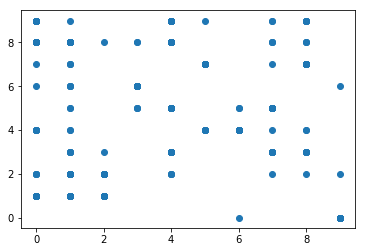

In [116]:
plt.scatter(digitKmeans.labels_, digittrainY)
plt.show()

In [119]:
predicted4 = digitKmeans.predict(digittrain_pca_X)
print (metrics.classification_report(digittrainY, predicted4))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       136
          1       0.40      0.52      0.45       150
          2       0.84      0.80      0.82       152
          3       0.00      0.00      0.00       158
          4       0.00      0.00      0.00       137
          5       0.00      0.00      0.00       152
          6       0.00      0.00      0.00       140
          7       0.01      0.01      0.01       140
          8       0.02      0.02      0.02       131
          9       0.00      0.00      0.00       141

avg / total       0.13      0.14      0.14      1437



In [173]:
digittrain_pca_X_list = digittrain_pca_X.tolist()
digitdist1 = euclidean_distances(digittrain_pca_X_list,digittrain_pca_X_list)

In [174]:
mds1 = MDS(n_components=2,dissimilarity='precomputed',random_state=30)

In [175]:
mds1Fit = mds1.fit_transform(digitdist1)

In [176]:
mds1arr = np.array(mds1Fit)
mds1arr

array([[-1.16698008,  7.77245459],
       [-7.46217608,  4.23325413],
       [ 9.16686778,  0.02774058],
       ..., 
       [-1.05972127,  5.99321297],
       [ 0.33758188,  1.14717411],
       [ 2.78024656, -8.70261153]])

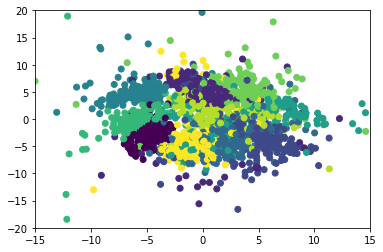

In [222]:
plt.scatter(mds1arr[:,0],mds1arr[:,1],c=digittrainY)
plt.xlim([-15,15])
plt.ylim([-20,20])
plt.show()

In [146]:
#Modelling without scaling and PCA to check accuracy

In [147]:
logreg3 = LogisticRegression()

In [148]:
logmodel3 = logreg3.fit(digittrainX,digittrainY)

In [149]:
predicted3 = logmodel3.predict(digittestX)

In [151]:
print (metrics.classification_report(digittestY,predicted3))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        42
          1       0.89      1.00      0.94        32
          2       1.00      1.00      1.00        25
          3       1.00      0.96      0.98        25
          4       0.98      0.95      0.97        44
          5       0.97      1.00      0.98        30
          6       1.00      1.00      1.00        41
          7       0.97      0.97      0.97        39
          8       0.97      0.91      0.94        43
          9       0.95      0.95      0.95        39

avg / total       0.97      0.97      0.97       360



In [178]:
#Calculating PCA without using library

In [197]:
digittrain_sc1_X = scalar1.fit_transform(digitX)

In [198]:
digitcov = np.cov(digittrain_sc1_X.T)

In [199]:
eigenVal, eigenVec = np.linalg.eig(digitcov)
eigenVec.shape

(64, 64)

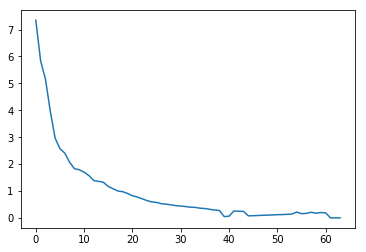

In [200]:
plt.plot(np.abs(eigenVal))
plt.show()

In [201]:
eigenVal

array([ 7.34477606,  5.83549054,  5.15396118,  3.96623597,  2.9663452 ,
        2.57204442,  2.40600941,  2.06867355,  1.82993314,  1.78951739,
        1.69784616,  1.57287889,  1.38870781,  1.35933609,  1.32152536,
        1.16829176,  1.08368678,  0.99977862,  0.97438293,  0.90891242,
        0.82271926,  0.77631014,  0.71155675,  0.64552365,  0.59527399,
        0.5765018 ,  0.52673155,  0.5106363 ,  0.48686381,  0.45560107,
        0.44285155,  0.42230086,  0.3991063 ,  0.39110111,  0.36094517,
        0.34860306,  0.3195963 ,  0.29406627,  0.27692285,  0.05037444,
        0.06328961,  0.258273  ,  0.24783029,  0.2423566 ,  0.07635394,
        0.08246812,  0.09018543,  0.09840876,  0.10250434,  0.11188655,
        0.11932898,  0.12426371,  0.13321081,  0.14311427,  0.217582  ,
        0.15818474,  0.16875236,  0.20799593,  0.17612894,  0.2000909 ,
        0.18983516,  0.        ,  0.        ,  0.        ])

In [202]:
digiteigenVec = eigenVec[:,(eigenVal>0.20)]
digiteigenVec.shape

(64, 45)

In [203]:
digitpca = np.dot(digittrain_sc1_X,digiteigenVec)
digitpca.shape

(1797, 45)

In [204]:
kmeans1 = KMeans(10)
kmeans1.fit(digitpca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

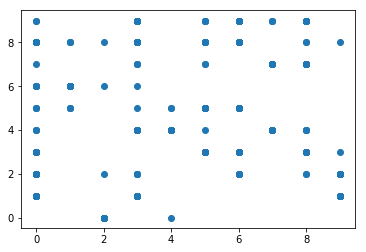

In [205]:
plt.scatter(kmeans1.labels_,digitY)
plt.show()

In [206]:
#Calculating MDS from manual pca

In [215]:
digitdist2 = euclidean_distances(digitpca.tolist())

In [216]:
mds2 = MDS(dissimilarity='precomputed',n_components=2,random_state=20)

In [217]:
mds2Fit = mds2.fit_transform(digitdist2)

In [218]:
mds2Fitarr = np.array(mds2Fit)
mds2Fitarr.shape

(1797, 2)

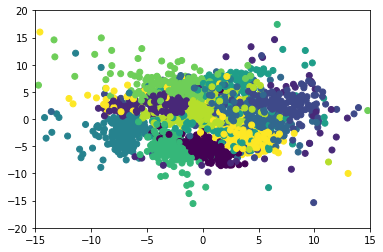

In [220]:
plt.scatter(mds2Fitarr[:,0],mds2Fitarr[:,1],c=digitY)
plt.xlim([-15,15])
plt.ylim([-20,20])
plt.show()